## gbm plot

In [1]:
import numpy as np
import pandas as pd
def gbm(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()
    return prices

In [2]:
p = gbm(n_scenarios = 3)

In [3]:
p.head()

,0,1,2
0,100.207303,96.749901,98.319429
1,97.795878,94.989628,97.713976
2,91.881339,96.727159,99.861829
3,98.764782,89.114211,102.000939
4,99.182211,91.777047,98.562165


In [4]:
p.plot()

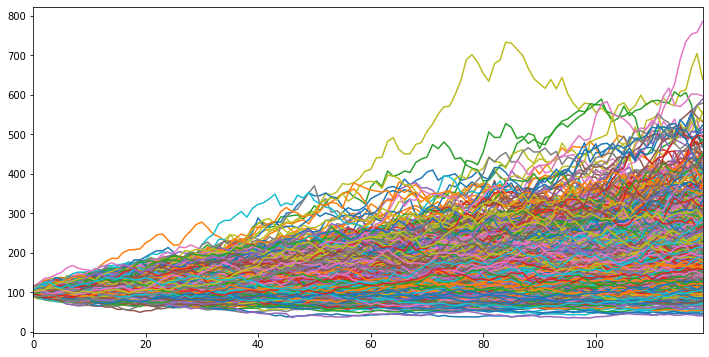

In [5]:
p = gbm(n_scenarios = 1000).plot(figsize = (12,6), legend = False)  # it is the plotting that is slow

In [6]:
def gbm0(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size = (n_steps, n_scenarios))
    rets = mu * dt + sigma * np.sqrt(dt) * xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1 + rets).cumprod()
    return prices

def gbm1(n_years = 10, n_scenarios = 1000, mu = 0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    (Improved version) Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc = (1 + mu * dt), scale = (sigma * np.sqrt(dt)) , size = (n_steps, n_scenarios))  
        # more efficient since it avoids implicit loops in calculating rets from xi, and 1 + rets
    rets_plus_1[0] = 1  # fix start point
    prices = s_0 * pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [7]:
%timeit gbm0(n_years = 5, n_scenarios = 1000)

1.13 s ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit gbm1(n_years = 5, n_scenarios = 1000)

345 ms ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


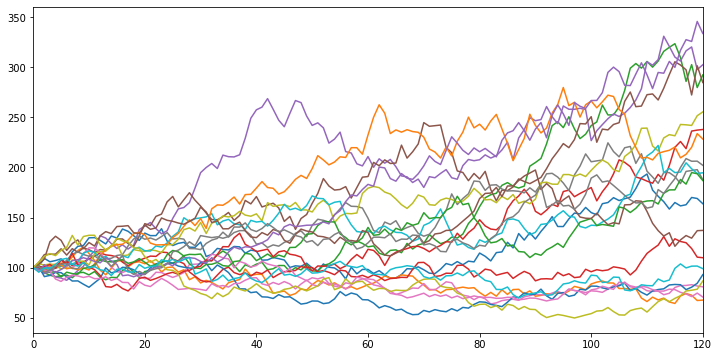

In [9]:
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
erk.gbm(n_years = 10, n_scenarios = 20).plot(legend = False, figsize = (12, 6))

## GBM interactive plot

In [10]:
import ipywidgets as widgets
#from Ipython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


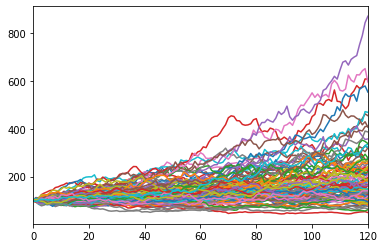

In [11]:
erk.gbm(10, 100).plot(legend = False)

In [12]:
def show_gbm(n_scenarios, mu, sigma):
    s_0 = 100
    prices = erk.gbm(n_scenarios = n_scenarios, mu = mu, sigma = sigma, s_0 = s_0)
    ax = prices.plot(legend = False, color = "indianred", alpha = 0.5, linewidth = 2, figsize = (12, 5))
    ax.axhline(y = s_0, ls = ":", color = "black")
    ax.plot(0, s_0, marker = 'o', color = 'darkred', alpha = 0.2)

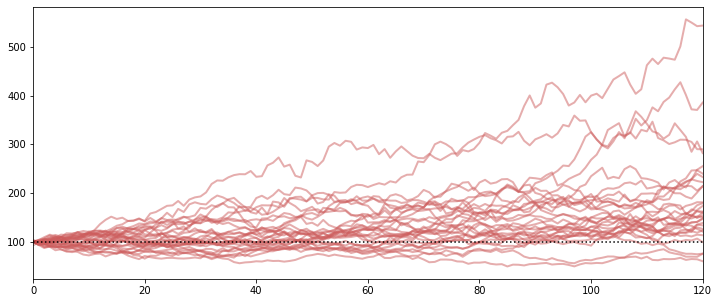

In [13]:
show_gbm (30, 0.07, 0.15)

In [14]:
gbm_control = widgets.interactive(show_gbm, 
                                  n_scenarios = (1, 20, 5), 
                                  mu = (0, 0.2, 0.01), 
                                  sigma = (0, 0.3, 0.01))
display(gbm_control)

interactive(children=(IntSlider(value=6, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value=…

## interactive cppi simulation - monte carlo

In [15]:
def show_cppi(n_scenarios = 50, mu = 0.07, sigma = 0.15, m = 3, floor = 0, riskfree_rate = 0.03, y_max = 100):
    start = 100
    sim_rets = erk.gbm(n_scenarios = n_scenarios, mu = mu, sigma= sigma, steps_per_year= 12, prices = False)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r = risky_r, riskfree_rate = riskfree_rate, m = m, start = start, floor = floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max() * y_max / 100
    ax = wealth.plot(legend = False, color = "indianred", alpha = 0.3, figsize = (12, 6))
    ax.axhline(y = start, ls = ":", color = "black")
    ax.axhline(y = start * floor, ls = "--", color = "red")
    ax.set_ylim(top = y_max)


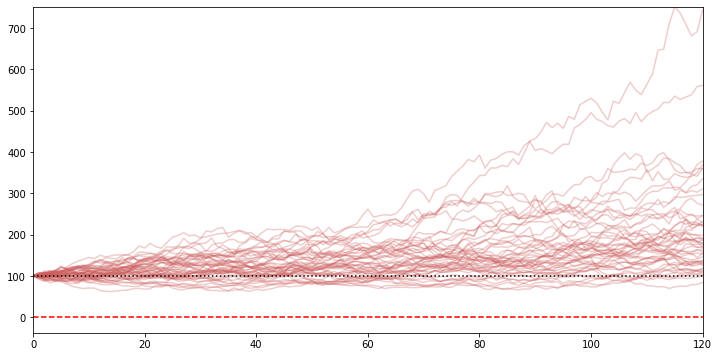

In [16]:
show_cppi()

In [17]:
cppi_control = widgets.interactive(show_cppi, 
                                  n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50),
                                  mu = (0, 0.2, 0.01), 
                                  sigma = (0, 0.3, 0.05),
                                   floor = (0,2, 0.1),
                                   m = (1, 5, 0.5),
                                   riskfree_rate = (0, 0.05, 0.01),
                                   y_max = widgets.IntSlider(min=0, max = 100, step = 1, value = 100, description = "Zoom Y Axis"))
display(cppi_control)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [18]:
import matplotlib.pyplot as plt
def show_cppi(n_scenarios = 50, mu = 0.07, sigma = 0.15, m = 3, floor = 0, riskfree_rate = 0.03, y_max = 100):
    start = 100
    sim_rets = erk.gbm(n_scenarios = n_scenarios, mu = mu, sigma= sigma, steps_per_year= 12, prices = False)
    risky_r = pd.DataFrame(sim_rets)
    
    # run the backtest
    btr = erk.run_cppi(risky_r = risky_r, riskfree_rate = riskfree_rate, m = m, start = start, floor = floor)
    wealth = btr["Wealth"]
    
    #calculate the terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start * floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    e_shortfall = np.dot(terminal_wealth - start * floor, failure_mask)/ n_failures if n_failures > 0 else 0.0
    
    #plot
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows = 1, ncols = 2, sharey = True, gridspec_kw = {"width_ratios": [3,2]}, figsize = (24,9))
    plt.subplots_adjust(wspace = 0)
    
    wealth.plot(ax = wealth_ax, legend = False, color = "indianred", alpha = 0.3)
    wealth_ax.axhline(y = start, ls = ":", color = "black")
    wealth_ax.axhline(y = start * floor, ls = "--", color = "red")
    wealth_ax.set_ylim(top = y_max)
    
    terminal_wealth.plot.hist(ax = hist_ax, bins = 50, ec = 'w', fc = 'indianred', orientation = 'horizontal')
    hist_ax.axhline(y = start, ls = ":", color = 'black')
    hist_ax.axhline(y = tw_mean, ls = ":", color = 'blue')
    hist_ax.axhline(y = tw_median, ls = ":", color = 'purple')
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy = (.7, .9), xycoords = 'axes fraction', fontsize = 24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy = (.7, .85), xycoords = 'axes fraction', fontsize = 24)
    if (floor > 0.01):
        hist_ax.axhline(y = start * floor, ls = "--", color = "red", linewidth = 3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail * 100: 2.2f} %)\nE(shortfall) = ${e_shortfall: 2.2f}", xy = (.7, .7), xycoords = "axes fraction", fontsize = 24)

In [19]:
cppi_control = widgets.interactive(show_cppi, 
                                  n_scenarios = widgets.IntSlider(min = 1, max = 1000, step = 5, value = 50),
                                  mu = (0, 0.2, 0.01), 
                                  sigma = (0, 0.5, 0.05),
                                  floor = (0,2, 0.1),
                                  m = (1, 5, 0.5),
                                  riskfree_rate = (0, 0.05, 0.01),
                                  y_max = widgets.IntSlider(min=0, max = 100, step = 1, value = 100, description = "Zoom Y Axis"))
display(cppi_control)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…